# Data Exploration
This notebook explores the F1 dataset to understand the data structure and identify key features for prediction.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set display options
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8")


## Load Data
Load the F1 datasets from the raw data folder.

In [ ]:
# Load main datasets
raw_data_path = "../data/raw"

races = pd.read_csv(f"{raw_data_path}/races.csv")
results = pd.read_csv(f"{raw_data_path}/results.csv")
drivers = pd.read_csv(f"{raw_data_path}/drivers.csv")
constructors = pd.read_csv(f"{raw_data_path}/constructors.csv")
circuits = pd.read_csv(f"{raw_data_path}/circuits.csv")
lap_times = pd.read_csv(f"{raw_data_path}/lap_times.csv")
pit_stops = pd.read_csv(f"{raw_data_path}/pit_stops.csv")
qualifying = pd.read_csv(f"{raw_data_path}/qualifying.csv")

print("Data loaded successfully!")

print("")
print(f"Races: {races.shape}")
print(f"Results: {results.shape}")
print(f"Drivers: {drivers.shape}")
print(f"Constructors: {constructors.shape}")
print(f"Circuits: {circuits.shape}")
print(f"Lap Times: {lap_times.shape}")
print(f"Pit Stops: {pit_stops.shape}")
print(f"Qualifying: {qualifying.shape}")


Data loaded successfully!

Races: (1125, 18)
Results: (26759, 18)
Drivers: (861, 9)
Constructors: (212, 5)
Circuits: (77, 9)
Lap Times: (589081, 6)
Pit Stops: (11371, 7)
Qualifying: (10494, 9)


## Data Overview

In [4]:
# Explore races data
print("Races Data:")
print(races.head(5))

print("")
print("Info:")
print(races.info())


Races Data:
   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0       \N       \N       \N    

In [5]:
# Explore results data
print("Results Data:")
print(results.head(5))

print("")
print("Info:")
print(results.info())


Results Data:
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1   

## Key Insights to Explore
1. What years of data do we have?
2. How many races per year?
3. Who are the most successful drivers?
4. Which constructors win most often?
5. Missing data patterns

Data Range:
Spans from 1950 to 2024


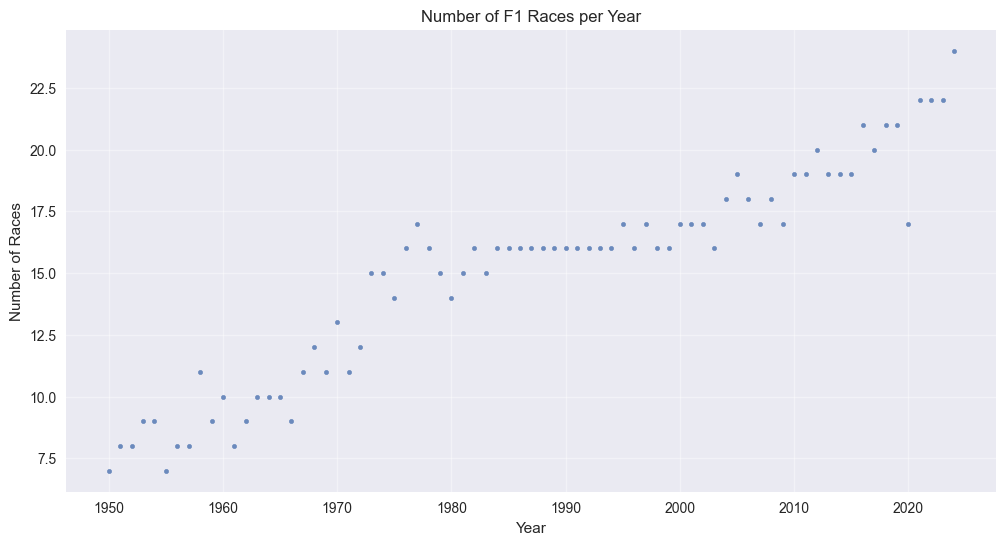

In [ ]:
# Year range
print("Data Range:")
print(f"Spans from {races['year'].min()} to {races['year'].max()}")

# Races per year
races_per_year = races.groupby("year").size().reset_index(name="race_count")

plt.figure(figsize=(12, 6))
plt.scatter(races_per_year["year"], races_per_year["race_count"], alpha=0.8, s=10)
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.title("Number of F1 Races per Year")
plt.grid(True, alpha=0.4)
plt.show()


In [ ]:
# Winners analysis

# Convert position to numeric (some values might be '\\N')
results["position_num"] = pd.to_numeric(results["position"], errors="coerce")

# Filter for winners (position = 1)
winners = results[results["position_num"] == 1].copy()
print(f"Found {len(winners)} race wins.")

# Merge with driver names
winner_names = winners.merge(
    drivers[["driverId", "forename", "surname"]], on="driverId"
)

## Add full_name column
winner_names["full_name"] = winner_names["forename"] + " " + winner_names["surname"]
winner_name_counts = (
    winner_names.groupby("full_name").size().sort_values(ascending=False)
)

print("")
print("Top 10 Most Successful Drivers (with names):")
print(winner_name_counts.head(10))

# Count wins (position = 1)
driver_wins = (
    winner_names[winner_names["position"] == "1"]
    .groupby("full_name")
    .size()
    .sort_values(ascending=False)
)
top_winners = driver_wins.nlargest(15)


Found 1128 race wins.

Top 10 Most Successful Drivers (with names):
full_name
Lewis Hamilton        105
Michael Schumacher     91
Max Verstappen         63
Sebastian Vettel       53
Alain Prost            51
Ayrton Senna           41
Fernando Alonso        32
Nigel Mansell          31
Jackie Stewart         27
Niki Lauda             25
dtype: int64


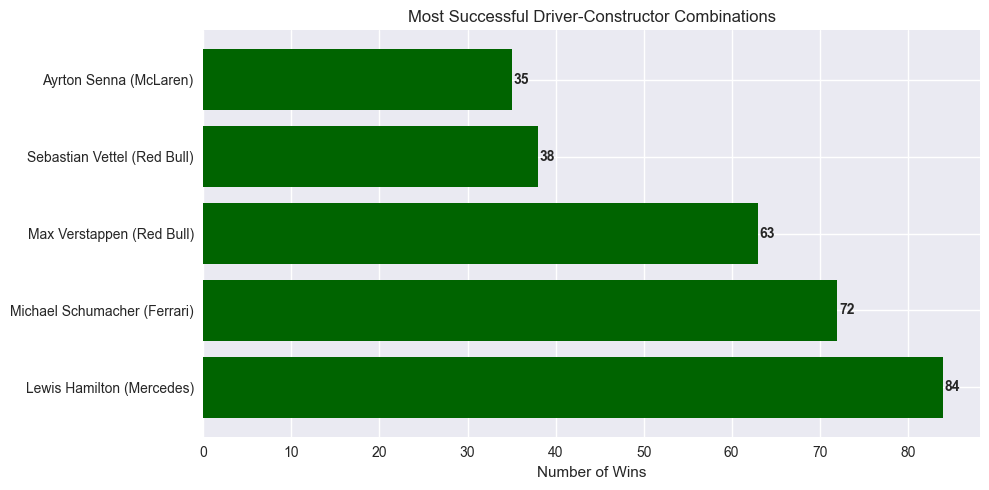

Top 10 Driver-Constructor Combinations:
    constructor_name           full_name  wins
136         Mercedes      Lewis Hamilton    84
65           Ferrari  Michael Schumacher    72
145         Red Bull      Max Verstappen    63
146         Red Bull    Sebastian Vettel    38
112          McLaren        Ayrton Senna    35
111          McLaren         Alain Prost    30
186         Williams       Nigel Mansell    28
137         Mercedes        Nico Rosberg    23
127          McLaren      Lewis Hamilton    21
179         Williams          Damon Hill    21


In [ ]:
def get_driver_constructor_wins(results, drivers, constructors):
    """Get wins data with driver and constructor information merged."""
    return (
        results[results["position"] == "1"]
        .merge(drivers[["driverId", "forename", "surname"]], on="driverId")
        .merge(constructors[["constructorId", "name"]], on="constructorId")
        .assign(
            full_name=lambda df: df["forename"] + " " + df["surname"],
            constructor_name=lambda df: df["name"],
        )
    )


def get_top_combinations(wins_data, n=5):
    """Get top n driver-constructor combinations by wins."""
    return (
        wins_data.groupby(["constructor_name", "full_name"])
        .size()
        .reset_index(name="wins")
        .nlargest(n, "wins")
    )


def plot_top_combinations(top_combos):
    """Create horizontal bar chart for top driver-constructor combinations."""
    fig, ax = plt.subplots(figsize=(10, 5))

    # Create labels and plot bars
    labels = [
        f"{row['full_name']} ({row['constructor_name']})"
        for _, row in top_combos.iterrows()
    ]
    bars = ax.barh(range(len(top_combos)), top_combos["wins"], color="darkgreen")

    # Configure plot
    ax.set_yticks(range(len(top_combos)))
    ax.set_yticklabels(labels)
    ax.set_xlabel("Number of Wins")
    ax.set_title("Most Successful Driver-Constructor Combinations")

    # Add value labels
    for i, (bar, wins) in enumerate(zip(bars, top_combos["wins"])):
        ax.text(
            bar.get_width() + 0.2,
            bar.get_y() + bar.get_height() / 2,
            str(wins),
            va="center",
            fontweight="bold",
        )

    plt.tight_layout()
    plt.show()


# Main execution
wins_data = get_driver_constructor_wins(results, drivers, constructors)
top_combos = get_top_combinations(wins_data, n=5)
plot_top_combinations(top_combos)

print("Top 10 Driver-Constructor Combinations:")
print(get_top_combinations(wins_data, n=10))


## Next Steps
Based on this exploration, we'll do the following:

1. Focus on recent years for better prediction relevance
2. Create features from driver/constructor historical performance
3. Perform imputing on data appropriately
4. Prepare data for linear regression modeling